Example complicated lactam analysis using multiple cores.  Note that the cores need to be used in order of least to most specific here as the first core matched will be used to form the RGroups.

In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition
import pandas as pd
from rdkit.Chem import PandasTools
from collections import OrderedDict

/Users/kellebr5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: to-Python converter for std::vector<boost::shared_ptr<RDKit::ROMol>, std::allocator<boost::shared_ptr<RDKit::ROMol> > > already registered; second conversion method ignored.


In [2]:
cores = OrderedDict()
cores_stereo = OrderedDict()

cores['cephem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])CS2')
cores_stereo['cephem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])CS2')

cores['carbacephem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])CC2')
cores_stereo['carbacephem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])CC2')

cores['oxacephem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])CO2')
cores_stereo['oxacephem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])CO2')

cores['carbapenem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])C2')
cores_stereo['carbapenem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])C2')

cores['carbapenam'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)C([*:3])([*:4])C2')
cores_stereo['carbapenam'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)C([*:3])([*:4])C2')

cores['penem'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)=C([*:3])S2')
cores_stereo['penem'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)=C([*:3])S2')

cores['penam'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)C([*:3])([*:4])S2')
cores_stereo['penam'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)C([*:3])([*:4])S2')

cores['oxapenam'] = Chem.MolFromSmiles('O=C1C([*:1])C2N1C(C(O)=O)C([*:3])([*:4])O2')
cores_stereo['oxapenam'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])[C@@H]2N1C(C(O)=O)C([*:3])([*:4])O2')

cores['monobactam'] = Chem.MolFromSmiles('O=C1C([*:1])C([*:5])N1')
cores_stereo['monobactam'] = Chem.MolFromSmiles('O=C1C([*:2])([*:1])C([*:6])([*:5])N1')

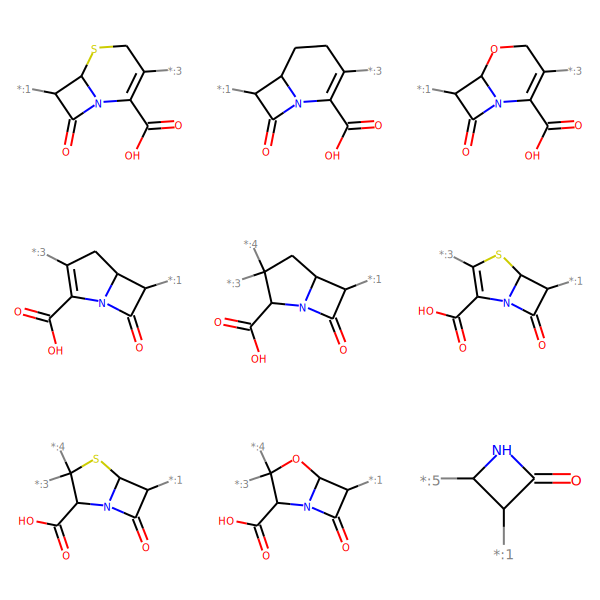

In [3]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(cores.values())

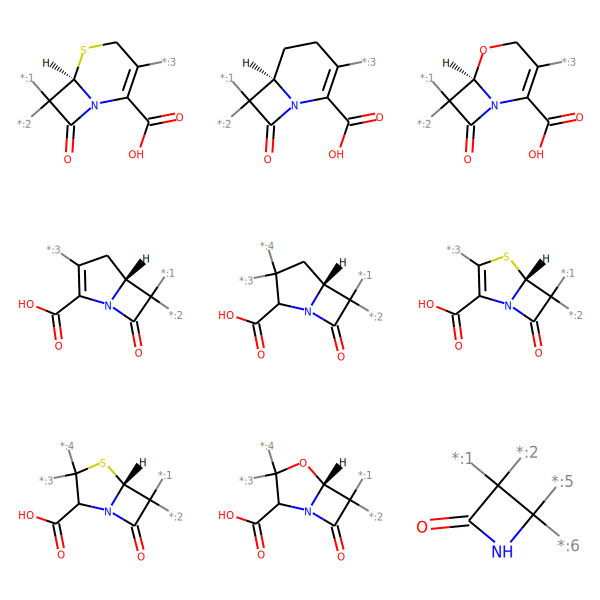

In [4]:
Draw.MolsToGridImage(cores_stereo.values())

To use RGroupDecomposition:
  
  1. construct the class on the core rg = RGroupDecomposition(cores)
  2. Call rg.Add( mol ) on the molecules.  If this returns -1, the molecule is not
     compatible with the core
  3. After all molecules are added, call rg.Process() to complete the rgroup
     decomposition.
     
This is not the fastest thing on the planet, you will note that it gets slower as more items get added, this is due to the internal processing every five molecules...


In [5]:
rg_easy = RGroupDecomposition(cores.values())
rg_stereo = RGroupDecomposition(cores_stereo.values())
print("Added cores")
mols = []
count = 0
maxEasy = -1
maxStereo = -1
for line in open("compounds.txt"):
    sm = line.split()[-1]
    m = Chem.MolFromSmiles(sm)
    if m:
        count += 1
        idx1 = maxEasy = max(maxEasy,rg_easy.Add(m))
        idx2 = maxStereo = max(maxStereo,rg_stereo.Add(m))
        if count % 100 == 0:
            print("Added", count, maxEasy, maxStereo)
print ("Added %s to RGroup Easy Decomposition out of %s"%(idx1, count))
print ("Added %s to RGroup Stereo Decomposition out of %s"%(idx2, count))

Added cores
Added 100 99 99
Added 200 199 199
Added 300 299 299
Added 400 399 399
Added 500 499 499
Added 600 599 599
Added 700 699 699
Added 800 799 799
Added 900 899 899
Added 1000 999 999
Added 1100 1099 1099
Added 1200 1199 1199
Added 1300 1299 1299
Added 1400 1399 1399
Added 1500 1499 1499
Added 1600 1599 1599
Added 1700 1699 1699
Added 1800 1799 1799
Added 1900 1899 1899
Added 2000 1999 1999
Added 2100 2099 2099
Added 2200 2199 2199
Added 2300 2299 2299
Added 2400 2399 2399
Added 2500 2499 2499
Added 2600 2599 2599
Added 2700 2699 2699
Added 2800 2799 2799
Added 2900 2899 2899
Added 3000 2999 2999
Added 3100 3099 3099
Added 3200 3199 3199
Added 3300 3299 3299
Added 3400 3399 3399
Added 3500 3499 3499
Added 3600 3599 3599
Added 3700 3699 3699
Added 3800 3799 3799
Added 3900 3899 3899
Added 4000 3999 3999
Added 4100 4099 4099
Added 4200 4199 4199
Added 4300 4299 4299
Added 4339 to RGroup Easy Decomposition out of 4340
Added 4339 to RGroup Stereo Decomposition out of 4340


RDKit ERROR: [10:56:01] SMILES Parse Error: syntax error for input: 'CANONICAL_SMILES'


In [6]:
rg_easy.Process()
rg_stereo.Process()

True

Rendering this many molecules is pretty taxing for the current system, this takes a while.

It is useful to disable logging here.  When making RGroup renderings there 
are a lot of sanitization warnings.

In [7]:
from rdkit import rdBase
rdBase.DisableLog("rdApp.*")

The RGroupDecomposition code is quite compatible with the python pandas integration.
Calling rg.GetRGroupsAsColumns() can be sent directly into a pandas table.

**n.b.** You need to call PandasTools.ChangeMoleculeRendering(frame) to allow the molecules
to be rendered properly.

In [ ]:
easy_frame = pd.DataFrame(rg_easy.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(easy_frame)

In [ ]:
easy_frame

In [ ]:
stereo_frame = pd.DataFrame(rg_stereo.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(stereo_frame)

In [ ]:
stereo_frame